# Question 1: Exercise 13
This exercise involves creating simulated data and fitting both linear and polynomial regression models to it.

First, we import the required libraries

In [1]:
!pip install ISLP

In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

from ISLP.models import (ModelSpec as MS, summarize, poly)

#### In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

In [2]:
# Random number generator with seed 1
np.random.seed(1)

#### (a) Using the `normal()` method of your random number generator, create a vector, `x`, containing 1000 observations drawn from a $N(0,1)$ distribution. This represents a feature X

In [3]:
x = np.random.normal(size=1000)

#### (b) Using the `normal()` method, create a vector, `eps`, containing 100 observations drawn from a $N(0, 0.25)$ distribution—a normal distribution with mean zero and variance 0.25

In [4]:
eps = np.random.normal(scale=.25, size=1000)

#### (c) Using x and eps, generate a vector y according to the model 
$Y = −1 + 0.5X + \epsilon$
#### What is the length of the vector y ? What are the values of  $\beta_0$ and $\beta_1$ in this linear model?

In [5]:
y = -1 + 0.5*x + eps

print('The length of y is ' + str(len(y)))

The length of y is 1000


Following the formula, $Y = \beta_0 + \beta_1X + \epsilon$

Here, the value of $\beta_0$ is $-1$ and the value of $\beta_1$ is $0.5X$

#### (d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

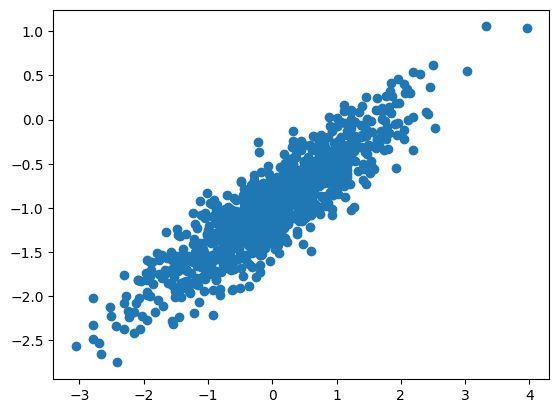

In [6]:
df = pd.DataFrame({'x': x, 'y': y})
plt.scatter(df.x, df.y)

From the scatterplot, we can notice that there is a clear linear relationship between $x$ and $y$.

#### (e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do $\hat{\beta}_0$ and $\hat{\beta}_1$ compare to $\beta_0$ and $\beta_1$ ?

In [7]:
X = smf.add_constant(df['x'])

reg = smf.OLS(y, X)
results = reg.fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     3706.
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:01:42   Log-Likelihood:                -62.000
No. Observations:                1000   AIC:                             128.0
Df Residuals:                     998   BIC:                             137.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9934      0.008   -121.803      0.000      -1.009      -0.977
x              0.5057      0.008     60.880      0.000       0.489       0.522
==============================================================================
Omnibus:                        0.995   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                1.030
Skew:                          -0.002   Prob(JB):                        0.598
Kurtosis:                       2.843   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
results.params

const   -0.993391
x        0.505737
dtype: float64

$\beta_0 = -1$ 
$\;\;\;\;\;\;$ 
$\hat{\beta_0} = -0.993391$

$\beta_1 = 0.5$
$\;\;\;\;\;\;$ 
$\hat{\beta_1} = 0.505737$ 


Here, we can see that the values for $\hat{\beta_0}$ and $\hat{\beta_1}$ are very similar to the values of $\beta_0$ and $\beta_1$.

#### (f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.

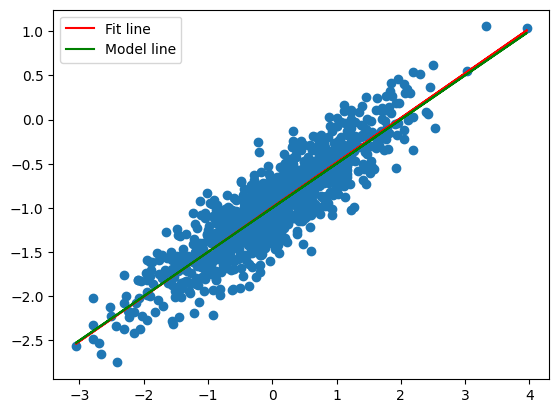

In [10]:
plt.scatter(df.x, df.y)

fit, = plt.plot(df.x, results.predict(X), color='red')

model, = plt.plot(df.x, -1+0.5*df.x, color='green')

plt.legend([fit, model],['Fit line','Model line'])

#### (g) Now fit a polynomial regression model that predicts y using x and x 2 . Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [11]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['x']])
model_quad = LinearRegression().fit(X_poly, y)

X_quad_sm = smf.add_constant(X_poly)
model_quad_sm = smf.OLS(y, X_quad_sm).fit()
model_quad_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     1858.
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:02:03   Log-Likelihood:                -60.515
No. Observations:                1000   AIC:                             127.0
Df Residuals:                     997   BIC:                             141.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0028      0.010   -102.246      0.000      -1.022      -0.984
x1             0.5056      0.008     60.926      0.000       0.489       0.522
x2             0.0098      0.006      1.722      0.085      -0.001       0.021
==============================================================================
Omnibus:                        0.840   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.657   Jarque-Bera (JB):                0.896
Skew:                           0.003   Prob(JB):                        0.639
Kurtosis:                       2.853   Cond. No.                         2.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the model summary, we can see that the $P > |t|$ value for the quadratic term is $0.085$, which suggests that there is very weak evidence for a significant relationship between $x^2$ and $y$, and hence, the quadratic term does not necessarily improve the model fit.

##### You should also fit polynomial regression models up to degree d = 10, and then determine which value of d give the best polynomial fit. Use a cross-validation method of your choice; either leave-one-out cross-validation or ten-fold cross-validation. 

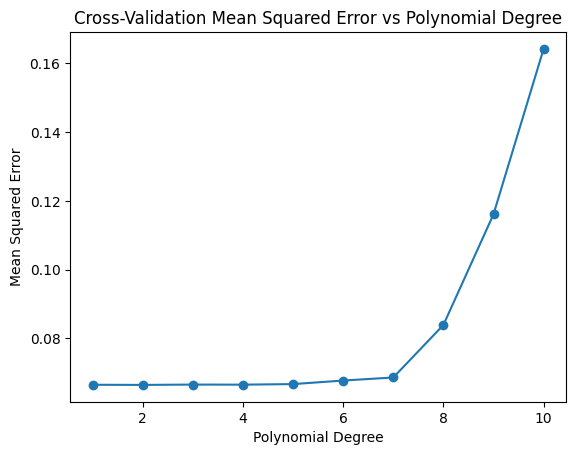

In [12]:
degrees = range(1, 11)
mean_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(df[['x']])
    model = LinearRegression()
    
    scores = cross_val_score(model, X_poly, y, cv=10, scoring='neg_mean_squared_error')
    mean_scores.append(np.mean(-scores))

plt.plot(degrees, mean_scores, marker='o')
plt.title('Cross-Validation Mean Squared Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.show()

As we can see from the graph, the mean squared error of the regression model increases with the polynomial degree, which suggests that a polynomial degree of $1$, or in another words a linear regression model, gives the best fit.

#### (h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

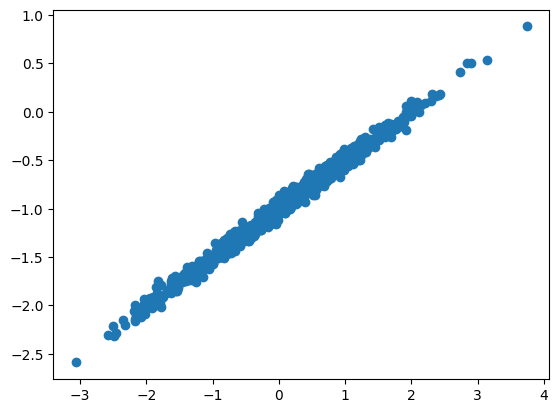

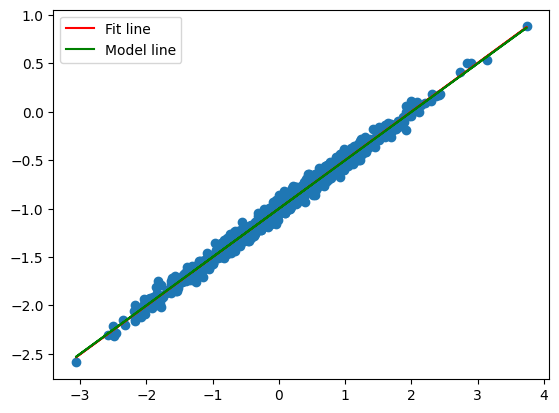

In [13]:
x = np.random.normal(size=1000)
eps = np.random.normal(scale = .05, size=1000)

y = -1 + .5*x + eps

df = pd.DataFrame({'x': x, 'y': y})
plt.scatter(df.x, df.y)
plt.show()

X = smf.add_constant(df['x'])

reg = smf.OLS(y, X)
results = reg.fit()

plt.scatter(df.x, df.y)

fit, = plt.plot(df.x, results.predict(X), color='red')

model, = plt.plot(df.x, -1+0.5*df.x, color='green')

plt.legend([fit, model],['Fit line','Model line'])

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 9.329e+04
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        14:02:23   Log-Likelihood:                 1568.6
No. Observations:                1000   AIC:                            -3133.
Df Residuals:                     998   BIC:                            -3123.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9998      0.002   -626.359      0.000      -1.003      -0.997
x              0.5016      0.002    305.435      0.000       0.498       0.505
==============================================================================
Omnibus:                        1.410   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.475
Skew:                           0.086   Prob(JB):                        0.478
Kurtosis:                       2.925   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $\epsilon$ in (b). Describe your results.

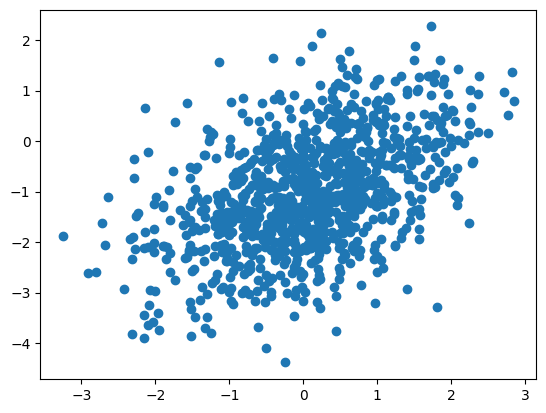

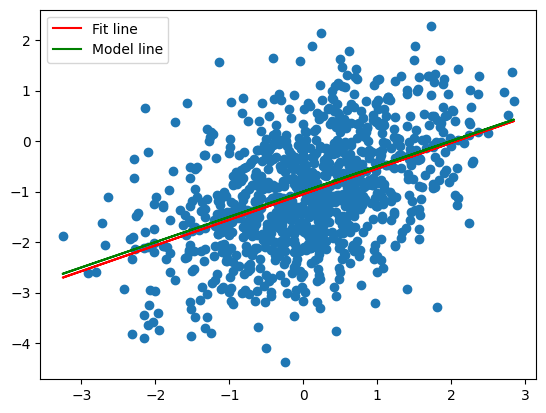

In [15]:
x = np.random.normal(size=1000)
eps = np.random.normal(scale = 1, size=1000)

y = -1 + .5*x + eps

df = pd.DataFrame({'x': x, 'y': y})
plt.scatter(df.x, df.y)
plt.show()

X = smf.add_constant(df['x'])

reg = smf.OLS(y, X)
results = reg.fit()

plt.scatter(df.x, df.y)

fit, = plt.plot(df.x, results.predict(X), color='red')

model, = plt.plot(df.x, -1+0.5*df.x, color='green')

plt.legend([fit, model],['Fit line','Model line'])

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     270.8
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           5.06e-54
Time:                        14:02:27   Log-Likelihood:                -1410.3
No. Observations:                1000   AIC:                             2825.
Df Residuals:                     998   BIC:                             2834.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0510      0.031    -33.403      0.000      -1.113      -0.989
x              0.5076      0.031     16.457      0.000       0.447       0.568
==============================================================================
Omnibus:                        1.003   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                0.891
Skew:                           0.065   Prob(JB):                        0.640
Kurtosis:                       3.068   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (j) What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

The confidence intervals for $\beta_0$ are as tabulated below:

|        | **0.025 $\beta_0$** | **$\beta_0$** | **0.975 $\beta_0$** |
|--------|-------------|-------------|-------------|
| **Less noisy data => $\epsilon = .05$**  | -1.003 | -0.9998 | -0.997 |
| **Original data => $\epsilon = .25$**  | -1.009 | -0.9934 | -0.977 |
| **More noisy data =>$\epsilon = 1$**  | -1.113 | -1.0510 | -0.989 |

The confidence intervals for $\beta_1$ are as tabulated below:

|        | **0.025 $\beta_1$** | **$\beta_1$** | **0.975 $\beta_1$** |
|--------|-------------|-------------|-------------|
| **Less noisy data => $\epsilon = .05$**  | 0.498 | 0.5016 | 0.505 |
| **Original data => $\epsilon = .25$**  | 0.489 | 0.5057 | 0.522 |
| **More noisy data =>$\epsilon = 1$**  | 0.447 | 0.5076 | 0.568 |

From the tabulated results, we can see that as the level of noise in the dataset increases, so does the width of the intervals